**
Let's install the necessaries libraries.** 

In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade sklearn.metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


**Reading the dataset**

In [ ]:
    # Displaying the first 8 rows of the dataset

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# New Section

In [ ]:
# Display total number of unique elements in each column

df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [ ]:
# Displays details of each column

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Data Cleaning and Exploratory Data Analysis**

In [ ]:
# Printing quick information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking missing values in each column

df.isnull() . sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


From the above result, we can see that the dataset contains many duplicates values. So I am going to remove the repeated observations except for the first occurence of each instance. 

In [ ]:
df = df.drop_duplicates(keep='first')


 Check the distribution of the credit card fraud cases

In [ ]:
# It is to check the number of frauds and the number of legitimate.
class_proportion = df['Class'].value_counts()
class_proportion

0    283253
1       473
Name: Class, dtype: int64

Plotting a barchart to visualize the distribution of the credit card fraud cases

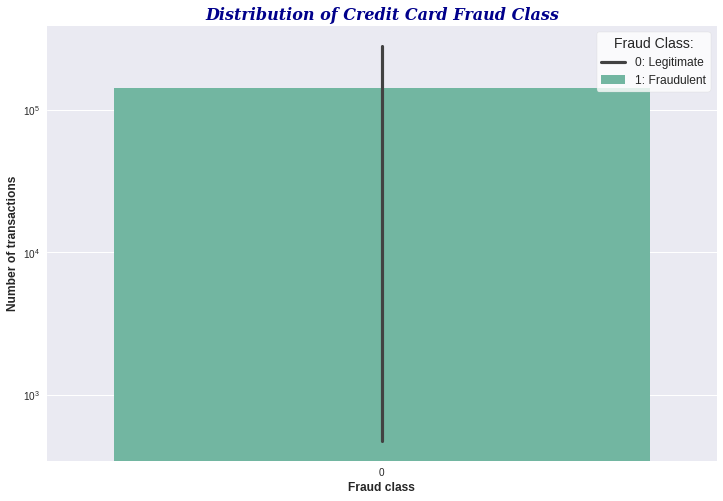

In [ ]:
plt.style.use('seaborn')
font1 = {'family' : 'serif',
         'fontstyle' : 'italic',
         'fontsize' : 16,
         'fontweight' : 'bold',
         'color' : 'DarkBlue'}
font2 = {'weight':'bold', 'size':12}
font3 = {'weight':'normal', 'size':12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(class_proportion.values, palette='Set2')
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Number of transactions', fontdict=font2)
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels=['0: Legitimate', '1: Fraudulent'], prop= font3, 
          title ='Fraud Class:', title_fontsize=14,
          frameon=True, facecolor='white')
plt.show()

Feature Engineering and Data Modeling 

In [ ]:
# Check the proportion of the fraud cases and identify the imbalance
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [ ]:
# Removing time and class columns
df.drop(columns=(['Time', 'Class']))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


**Balancing out the dataset with resampling techniques**

We will start by dividing the class

In [ ]:
class_count_0, class_count_1 = df['Class'].value_counts()
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (283253, 31)
class 1: (473, 31)


**Random Under-Sampling**


Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.
A drawback to undersampling is that we are removing some information that may be valuable.

total class of 1 and 0: 0    473
1    473
Name: Class, dtype: int64


<Axes: title={'center': 'count (target)'}>

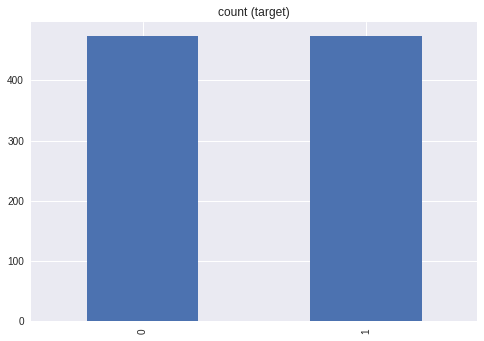

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())
# plot the count after under-sampling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')


**Random Over-Sampling**


Oversampling can be defined as adding more copies to the minority class.
A point to consider when oversampling is that it can cause overfitting and poor generalization to your test set.

total class of 1 and 0: 1    283253
0    283253
Name: Class, dtype: int64


<Axes: title={'center': 'count (target)'}>

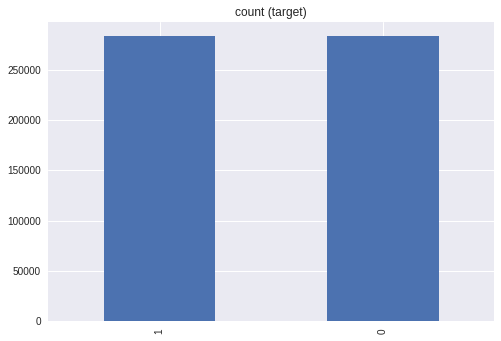

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Class'].value_counts())# plot the count after over-sampling
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

**Balance data with the imbalanced-learn python module: imblearn**

Let's classify the dataset

In [ ]:
x = df.drop(columns=(['Time', 'Class']))
y = df['Class']

In [ ]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

**Random under-sampling with imblearn**

original dataset shape: 0    283253
1       473
Name: Class, dtype: int64
Resample dataset shape 0    473
1    473
Name: Class, dtype: int64


<Axes: title={'center': 'count (target)'}>

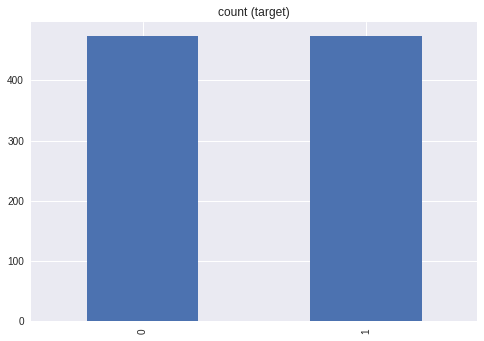

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', y.value_counts())
print('Resample dataset shape', y_rus.value_counts())
y_rus.value_counts().plot(kind='bar', title='count (target)')

**Random over-sampling with imblearn**

In [ ]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', y.value_counts())
print('Resample dataset shape', y_ros.value_counts())

Original dataset shape 0    283253
1       473
Name: Class, dtype: int64
Resample dataset shape 0    283253
1    283253
Name: Class, dtype: int64


**Balancing data with Tomek links**

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
Tomek’s link exists if the two samples are the nearest neighbors of each other.

**Under-sampling**

In [ ]:
tl = RandomUnderSampler(sampling_strategy='minority')

# fit predictor and target variable
x_tl, y_tl = rus.fit_resample(x, y)

print('Original dataset shape', y.value_counts())
print('Resample dataset shape', y_rus.value_counts())

Original dataset shape 0    283253
1       473
Name: Class, dtype: int64
Resample dataset shape 0    473
1    473
Name: Class, dtype: int64


**Over-sampling**

In [ ]:
tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(x, y)

print('Original dataset shape', y.value_counts())
print('Resample dataset shape', y_ros.value_counts())

Original dataset shape 0    283253
1       473
Name: Class, dtype: int64
Resample dataset shape 0    283253
1    283253
Name: Class, dtype: int64


**Balancing data with NearMiss**

**Under-sampling**

NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.

In [ ]:
nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', y.value_counts())
print('Resample dataset shape:', y_nm.value_counts())

Original dataset shape: 0    283253
1       473
Name: Class, dtype: int64
Resample dataset shape: 0    473
1    473
Name: Class, dtype: int64


**Balancing data with Synthetic Minority Oversampling Technique (SMOTE)**

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector;
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function);
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor;
Repeat the steps until data is balanced

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
x_oversampled , y_oversampled = sm.fit_resample(x, y)

unique_original, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 283253, 1: 473}
New transformed fraud class distribution: {0: 283253, 1: 283253}


**Random Forest Classifier(RFC) Model**

In [ ]:
# Separate the transformed features matrix and target vector into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, random_state=3)


In [ ]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_estimators=15)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
# Model Evalution -classification accuracy
training_rfc_accuracy = rfc.score(x_train, y_train)
testing_rfc_accuracy = rfc.score(x_test, y_test)

print("Training RFC Accuracy:", training_rfc_accuracy)
print("Testing RFC Accuracy:", testing_rfc_accuracy )

Training RFC Accuracy: 0.9999905855549462
Testing RFC Accuracy: 0.999837601587268


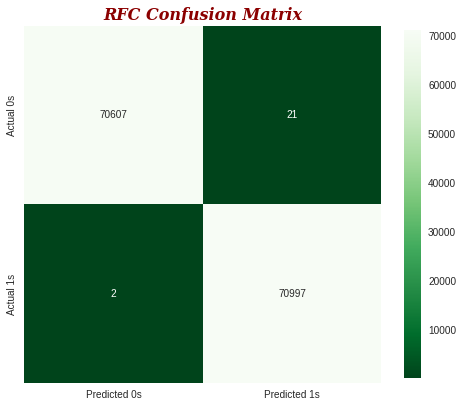

In [ ]:
# Plotting the confusion matrix 
fig, ax = plt.subplots(figsize=(8, 8))
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkRed'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, rfc.predict(x_test)), 
            cmap='Greens_r', 
            square=True,
            annot=True,
            fmt='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
ax.set_title('RFC Confusion Matrix', fontdict=font1)
plt.savefig("Random.png")
plt.show()




In [ ]:
# Model evaluation - Sensitivity, Specificity and Precision 

TN, FP, FN, TP = confusion_matrix(y_test, rfc.predict(x_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 70607
False Positives: 21
False Negatives: 2
True Positives: 70997

Sensitivity: 0.9999718305891633
Specificity: 0.9997026674973098
Precision: 0.9997043003182292


In [ ]:
# Check the predicted probabilities for every observation in the test data subset 
# Note that the default classification threshold is 0.5

testing_probabilities= rfc.predict_proba(x_test)
testing_probabilities

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
# Convert the testing probabilities into a dataframe
testing_probabilities_df = pd.DataFrame(testing_probabilities, columns=['1 - 𝑝(x_test)', '𝑝(X_test)'])
testing_probabilities_df.head()

,1 - 𝑝(x_test),𝑝(X_test)
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
# Get predictions
rfc.predict(x_test)

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is needed for the calculation, that is the second column
training_rfc_AUC = roc_auc_score(y_train, rfc.predict_proba(x_train)[:, 1]) 
testing_rfc_AUC = roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])

print("Training RFC AUC:", training_rfc_AUC)
print("Testing RFC AUC:", testing_rfc_AUC)

Training RFC AUC: 1.0
Testing RFC AUC: 0.9999704126062403


**Logistic Regression (LGR) Model**

In [ ]:
# Separate the transformed features matrix and target vector into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, random_state=3)

In [ ]:
# define dictionary of hyperparameters
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 10, 50, 100],
          'class_weight': [None, 'balanced']}

In [ ]:
# Instantiate Logistic Regression model. N.B: the default solver doesn't support l1 regularization
# Instantiate Grid Search to find the best hyperparameters and fit the model
lgr = LogisticRegression(solver='liblinear')
gs = GridSearchCV(lgr, params, cv = 2)
gs.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 10, 50, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Model evaluation - accuracy 
training_lgr_accuracy = gs.score(x_train, y_train)
testing_lgr_accuracy = gs.score(x_test, y_test)

print("Training LGR Accuracy:", training_lgr_accuracy)
print("Testing LGR Accuracy:", testing_lgr_accuracy)

Training LGR Accuracy: 0.9586541109351133
Testing LGR Accuracy: 0.9577058046841351


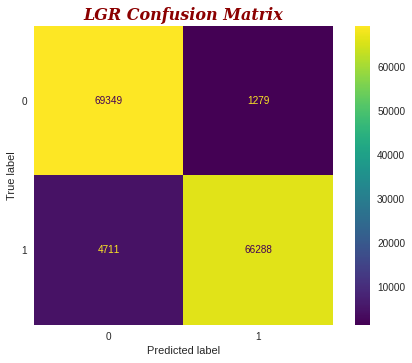

In [ ]:
# Plotting the confusion matrix 
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkRed'}

ConfusionMatrixDisplay.from_estimator(gs, x_test, y_test)
plt.title('LGR Confusion Matrix', fontdict=font1)
plt.grid(False)
plt.savefig("LR.png")

plt.show()


In [ ]:
# Model evaluation - Sensitivity, Specificity and Precision 
TN, FP, FN, TP = confusion_matrix(y_test, gs.predict(x_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 69349
False Positives: 1279
False Negatives: 4711
True Positives: 66288

Sensitivity: 0.9336469527739827
Specificity: 0.9818910347171094
Precision: 0.9810706409933844


In [ ]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is needed for the calculation, that is the second column
training_lgr_AUC = roc_auc_score(y_train, gs.predict_proba(x_train)[:, 1]) 
testing_lgr_AUC = roc_auc_score(y_test, gs.predict_proba(x_test)[:, 1])

print("Training LGR AUC:", training_lgr_AUC)
print("Testing LGR AUC:", testing_lgr_AUC)


Training LGR AUC: 0.9918809568873277
Testing LGR AUC: 0.9915969760648783


In [ ]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is needed for the calculation, that is the second column
training_lgr_AUC = roc_auc_score(y_train, gs.predict_proba(x_train)[:, 1]) 
testing_lgr_AUC = roc_auc_score(y_test, gs.predict_proba(x_test)[:, 1])

print("Training LGR AUC:", training_lgr_AUC)
print("Testing LGR AUC:", testing_lgr_AUC)

Training LGR AUC: 0.9918809568873277
Testing LGR AUC: 0.9915969760648783


**Gradient Boosting Classifier (GBC) Model**

In [ ]:
# Separate the transformed features matrix and target vector into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, random_state=3)

In [ ]:
# Instantiate and fit the model
gbc = GradientBoostingClassifier(n_estimators=50)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [ ]:
# Model evaluation - accuracy 
training_gbc_accuracy = gbc.score(x_train, y_train)
testing_gbc_accuracy = gbc.score(x_test, y_test)

print("Training GBC Accuracy:", training_gbc_accuracy)
print("Testing GBC Accuracy:", testing_gbc_accuracy)

Training GBC Accuracy: 0.9705539694830764
Testing GBC Accuracy: 0.969539706411913


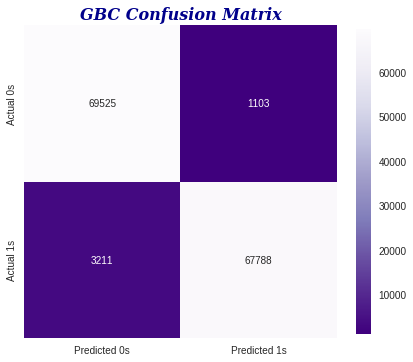

In [ ]:
# Plotting the confusion matrix for Gradient Boosting 
fig, ax = plt.subplots(figsize=(7, 7))
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, gbc.predict(x_test)), 
            cmap='Purples_r', 
            square=True,
            annot=True,
            fmt='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
ax.set_title('GBC Confusion Matrix', fontdict=font1)
plt.savefig("GBA.png")
plt.show()

In [ ]:
# Model evaluation - Sensitivity, Specificity and Precision 
TN, FP, FN, TP = confusion_matrix(y_test, gbc.predict(x_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 69525
False Positives: 1103
False Negatives: 3211
True Positives: 67788

Sensitivity: 0.954774010901562
Specificity: 0.9843829642634649
Precision: 0.9839892003309576
